In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading the labels for trajectories with three peaks
ytrain3 = np.loadtxt('../Data/Ytrain3.csv', delimiter=',')

In [3]:
#configure font properties for the plots
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size':13})
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 1

In [4]:
#select specific columns (2, 6, and 10) from the ytrain array to create nu3 with the positions of the peaks
nu3 = ytrain3[:,[2,6,10]]

#intialise an array of the same shape as nu3 to store sorted values
nus3_arr = np.zeros_like(nu3)

#iterate over each row of nu3 to sort the values
for i in range(nus3_arr.shape[0]):
    #sort the values in the current row of nu3 and store in the corresponding row of nus3_arr
    nus3_arr[i,:] = nu3[i, nu3[i,:].argsort()]

In [5]:
#create an array of epsilon values ranging from 0 to 0.45 with a step of 0.05
epsilon = np.arange(0, 0.45+0.05, 0.05)

#loading training loss values from the csv file into a numpy array
trainingloss = np.loadtxt('traininglossvepsilon.csv', delimiter=',')

#load the test loss values from the csv file into a numpy array 
testloss = np.loadtxt('testlossvepsilon.csv', delimiter=',')

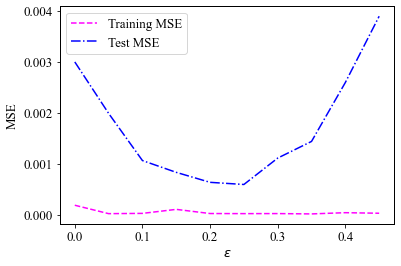

In [6]:
#plot the training and test loss against the epsilon values 
plt.plot(epsilon, trainingloss, '--', label='Training MSE', color='magenta')
plt.plot(epsilon, testloss, '-.', label='Test MSE', color='blue')
plt.xlabel(r"$\epsilon$")
plt.ylabel('MSE')
plt.legend()
plt.savefig('threepeaksregressionvepsilon.pdf')

In [7]:
#load predictions for the test set corresponding to epsilon=0.0
predictionstest0 = np.loadtxt('Predictions/predictionstest_epsilon0.0.csv', delimiter=',')

#extract the indices from the 4th column of the prediction data, coverting them to integers. These indices will be
#used to reference the true labels from the original nu3arr
indices_test0 = predictionstest0[:,3].astype(int)

#use the extracted indices to obtain the true values for the first nu from nus3_arr. 
y_true0nu1 = nus3_arr[indices_test0,:][:,0]

#get the predicted values for nu1 from the loaded prediction data
y_pred0nu1 = predictionstest0[:,0]

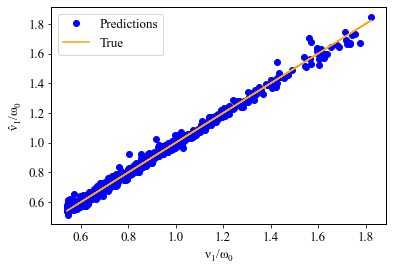

In [8]:
#Create a scatter plot of true values for $|nu_1$ versus predicted values
plt.plot(y_true0nu1, y_pred0nu1, 'bo', label='Predictions')
plt.plot(y_true0nu1, y_true0nu1, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_1 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_1 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu1vreal.pdf', bbox_inches='tight')

In [9]:
#define an array where each element is the difference between the predicted value and true value for each trajectory
diffs0nu1 = y_pred0nu1 - y_true0nu1
#print the minimum difference to find the smallest prediction error
print(np.amin(diffs0nu1))
#print the maximum difference to find the largest prediction error 
print(np.amax(diffs0nu1))

-0.10795764578613642
0.14438557254261286


In [10]:
#define an array of intervals that specifies a set of intervals for prediction errors 
intervals0nu1 = [-0.11, -0.105, -0.1, -0.095, -0.09, -0.085, -0.08, -0.075, -0.07, -0.065, -0.06, -0.055, -0.05, -0.045, -0.04, -0.035, -0.03, -0.025, -0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11,  0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145]

In [11]:
#intialise list to hold the frequency of prediction errors in intervals 
freq0nu1 = []

#loop through each interval to categorise the prediction errors
for i in range(len(intervals0nu1)-1):
    #create a mask to find differences within the current interval
    mask0nu1 = (diffs0nu1 >= intervals0nu1[i]) & (diffs0nu1 < intervals0nu1[i+1])
    #append the count of differences within the current interval to the frequency list 
    freq0nu1.append(len(diffs0nu1[mask0nu1]))

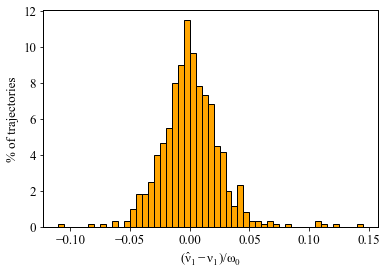

In [12]:
#calculate x positions for bars and heights
x0nu1 = intervals0nu1[1:] 
heights0nu1 = (np.array(freq0nu1)/600)*100

#create the bar chart 
plt.bar(x0nu1, heights0nu1, width=-0.005, align='edge', alpha = 1, color = 'orange', edgecolor='black') 
plt.xlabel(r"$\mathrm{(\hat{\nu}_1 - \nu_1)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu1.pdf', bbox_inches='tight')
plt.show()

In [13]:
#retrieve the true values for $|nu_2$ based on the indices from the test predictions
y_true0nu2 = nus3_arr[indices_test0,:][:,1]

#extract the predicted values for $|nu_2$
y_pred0nu2 = predictionstest0[:,1]

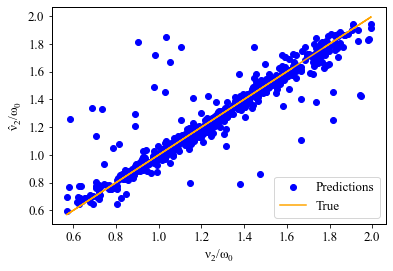

In [14]:
#plotting the predicted values for $|nu_2$ against the true values 
plt.plot(y_true0nu2, y_pred0nu2, 'bo', label='Predictions')
plt.plot(y_true0nu2, y_true0nu2, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_2 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_2 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu2vreal.pdf', bbox_inches='tight')

In [15]:
#calculate the difference between predicted and true values for $|nu_2$
diffs0nu2 = y_pred0nu2 - y_true0nu2
#print the minimum difference to find the smallest prediction error
print(np.amin(diffs0nu2))
#print the maximum difference to find the largest prediction error
print(np.amax(diffs0nu2))

-0.6164994779016493
0.9127851294198146


In [16]:
#define intervals for analysing the differences between predicted and true values for $|nu_2$
intervals0nu2 = [-0.62, -0.6, -0.58, -0.56, -0.54, -0.52, -0.5, -0.48, -0.46, -0.44, -0.42, -0.4, -0.38, -0.36, -0.34, -0.32, -0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92]

In [17]:
#Initialise list to store the frequencies of differences in intervals for $|nu_2$
freq0nu2 = []

#loop through each interval 
for i in range(len(intervals0nu2)-1):
    #create a mask to find differences within the current interval
    mask0nu2 = (diffs0nu2 >= intervals0nu2[i]) & (diffs0nu2 < intervals0nu2[i+1])
    #append the count of differences within the current interval to the frequency list
    freq0nu2.append(len(diffs0nu2[mask0nu2]))

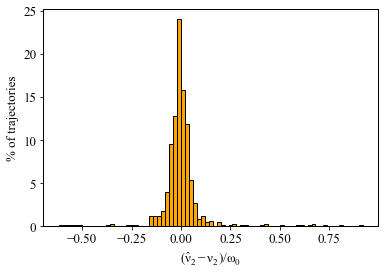

In [18]:
#calculate x positions for bars and heights
x0nu2 = intervals0nu2[1:] 
heights0nu2 = (np.array(freq0nu2)/600)*100

#create the bar chart
plt.bar(x0nu2, heights0nu2, width=-0.02, align='edge', alpha = 1, color = 'orange', edgecolor='black')  
plt.xlabel(r"$\mathrm{(\hat{\nu}_2 - \nu_2)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu2.pdf', bbox_inches='tight')
plt.show()

In [19]:
#retrieve the true values for $|nu_3$ based on the indices from the test predictions
y_true0nu3 = nus3_arr[indices_test0,:][:,2]

#extract the predicted values for $|nu_3$
y_pred0nu3 = predictionstest0[:,2]

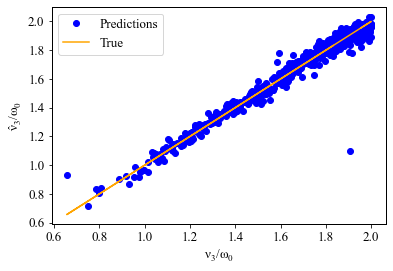

In [20]:
#plotting the predicted values for $|nu_3$ against the true values 
plt.plot(y_true0nu3, y_pred0nu3, 'bo', label='Predictions')
plt.plot(y_true0nu3, y_true0nu3, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_3 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_3 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu3vreal.pdf', bbox_inches='tight')

In [21]:
#calculate the difference between predicted and true values for $|nu_3$
diffs0nu3 = y_pred0nu3 - y_true0nu3
#print the minimum differrence to find the smallest prediction error
print(np.amin(diffs0nu3))
#print the maximum difference to find the largest prediction error
print(np.amax(diffs0nu3))

-0.8077248533888464
0.2741715092188056


In [22]:
#define intervals for analysing the differences between predicted and true values for $|nu_3$
intervals0nu3 = [-0.82, -0.8, -0.78, -0.76, -0.74, -0.72, -0.7, -0.68, -0.66, -0.64, -0.62, -0.6, -0.58, -0.56, -0.54, -0.52, -0.5, -0.48, -0.46, -0.44, -0.42, -0.4, -0.38, -0.36, -0.34, -0.32, -0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28]

In [23]:
#initialise list to store the frequencies of differences in intervals for $|nu_3$
freq0nu3 = []

#loop through each interval
for i in range(len(intervals0nu3)-1):
    #create a mask to find differences within the current interval
    mask0nu3 = (diffs0nu3 >= intervals0nu3[i]) & (diffs0nu3 < intervals0nu3[i+1])
    #append the count of differences within the current interval to the frequency list
    freq0nu3.append(len(diffs0nu3[mask0nu3]))

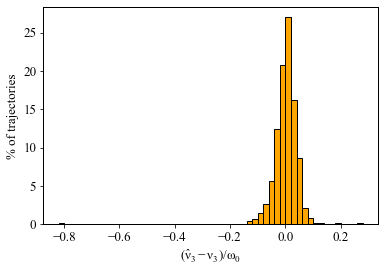

In [24]:
#calculate x positions for bars and heights
x0nu3 = intervals0nu3[1:] 
heights0nu3 = (np.array(freq0nu3)/600)*100

#create the bar chart
plt.bar(x0nu3, heights0nu3, width=-0.02, align='edge', alpha = 1, color = 'orange', edgecolor='black')  
plt.xlabel(r"$\mathrm{(\hat{\nu}_3 - \nu_3)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu3.pdf', bbox_inches='tight')
plt.show()

In [25]:
#load the predictions for the test set corresponding to epsilon = 0.25
predictionstest0p25 = np.loadtxt('Predictions/predictionstest_epsilon0.25.csv', delimiter=',')

#extract the indices from the 4th column of the prediction data, converting them to integers. These indices will be
#to reference the true labels from the original nu3arr
indices_test0p25 = predictionstest0p25[:,3].astype(int)

#use the extracted indices to obtain the true values for the first nu from nu3_arr
y_true0p25nu1 = nus3_arr[indices_test0p25,:][:,0]

#get the predicted values for nu1 from the loaded prediction data
y_pred0p25nu1 = predictionstest0p25[:,0]

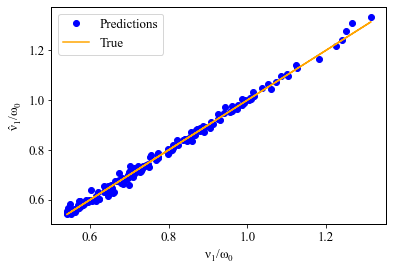

In [26]:
#plotting the predicted values for $|nu_1$ against the true values 
plt.plot(y_true0p25nu1, y_pred0p25nu1, 'bo', label='Predictions')
plt.plot(y_true0p25nu1, y_true0p25nu1, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_1 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_1 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu1vreal_aftersplitting.pdf', bbox_inches='tight')

In [27]:
#calculate the difference between predicted and true values for $|nu_1$
diffs0p25nu1 = y_pred0p25nu1 - y_true0p25nu1
#print the minimum difference to find the smallest prediction error
print(np.amin(diffs0p25nu1))
#print the maximum difference to find the largest prediction error
print(np.amax(diffs0p25nu1))

-0.03954173407570949
0.043671720696301985


In [28]:
#define intervals for analysing the differences between predicted and true values for $|nu_1$
intervals0p25nu1 = [-0.04, -0.038, -0.036, -0.034, -0.032, -0.03, -0.028, -0.026, -0.024, -0.022, -0.02, -0.018, -0.016, -0.014, -0.012, -0.01, -0.008, -0.006, -0.004, -0.002, 0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042, 0.044]

In [29]:
#initialise list to store the frequencies of differences in intervals for $|nu_1$
freq0p25nu1 = []

#loop through each interval
for i in range(len(intervals0p25nu1)-1):
    #create a mask to find differences within the current interval
    mask0p25nu1 = (diffs0p25nu1 >= intervals0p25nu1[i]) & (diffs0p25nu1 < intervals0p25nu1[i+1])
    #append the count of differences within the current interval to the frequency list
    freq0p25nu1.append(len(diffs0p25nu1[mask0p25nu1]))

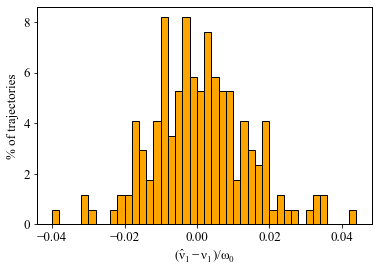

In [30]:
#calculate x positions for bars and heights
x0p25nu1 = intervals0p25nu1[1:] 
heights0p25nu1 = (np.array(freq0p25nu1)/171)*100

#create the bar chart
plt.bar(x0p25nu1, heights0p25nu1, width=-0.002, align='edge', alpha = 1, color = 'orange', edgecolor='black')  
plt.xlabel(r"$\mathrm{(\hat{\nu}_1 - \nu_1)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu1_aftersplitting.pdf', bbox_inches='tight')
plt.show()

In [31]:
#retrieve the true values for $|nu_2$ based on the indices from the test predictions
y_true0p25nu2 = nus3_arr[indices_test0p25,:][:,1]

#extract the predicted values for $|nu_2$
y_pred0p25nu2 = predictionstest0p25[:,1]

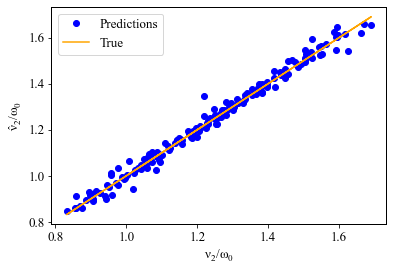

In [32]:
#plotting the predicted values for $|nu_2$ against the true values 
plt.plot(y_true0p25nu2, y_pred0p25nu2, 'bo', label='Predictions')
plt.plot(y_true0p25nu2, y_true0p25nu2, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_2 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_2 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu2vreal_aftersplitting.pdf', bbox_inches='tight')

In [33]:
#calculate the difference between predicted and true values for $|nu_2$
diffs0p25nu2 = y_pred0p25nu2 - y_true0p25nu2
#print the minimum difference to find the smallest prediction error
print(np.amin(diffs0p25nu2))
#print the maximum difference to find the largest prediction error
print(np.amax(diffs0p25nu2))

-0.0864322533673505
0.12984434238034304


In [34]:
#define intervals for analysing the differences between predicted and true values for $|nu_2$
intervals0p25nu2 = [-0.09, -0.085, -0.08, -0.075, -0.07, -0.065, -0.06, -0.055, -0.05, -0.045, -0.04, -0.035, -0.03, -0.025, -0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13]

In [35]:
#initialise list to store the frequencies of differences in intervals for $|nu_2$
freq0p25nu2 = []

#loop through each interval
for i in range(len(intervals0p25nu2)-1):
    #create a mask to find differences within the current interval
    mask0p25nu2 = (diffs0p25nu2 >= intervals0p25nu2[i]) & (diffs0p25nu2 < intervals0p25nu2[i+1])
    #append the count of differences within the current interval to the frequency list
    freq0p25nu2.append(len(diffs0p25nu2[mask0p25nu2]))

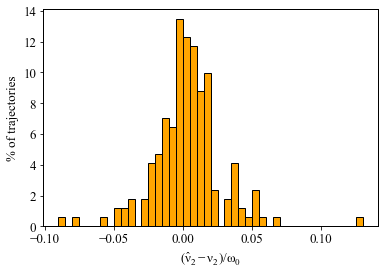

In [36]:
#calculate x positions for bars and heights
x0p25nu2 = intervals0p25nu2[1:] 
heights0p25nu2 = (np.array(freq0p25nu2)/171)*100

#create the bar chart
plt.bar(x0p25nu2, heights0p25nu2, width=-0.005, align='edge', alpha = 1, color = 'orange', edgecolor='black')  
plt.xlabel(r"$\mathrm{(\hat{\nu}_2 - \nu_2)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu2_aftersplitting.pdf', bbox_inches='tight')
plt.show()

In [37]:
#retrieve the true values for $|nu_3$ based on the indices from the test predictions
y_true0p25nu3 = nus3_arr[indices_test0p25,:][:,2]

#extract the predicted values for $|nu_3$
y_pred0p25nu3 = predictionstest0p25[:,2]

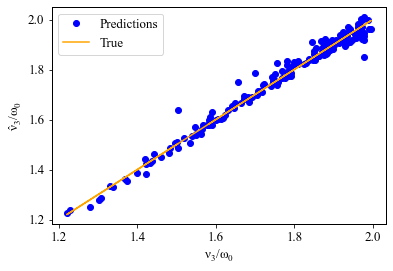

In [38]:
#plotting the predicted values for $|nu_3$ against the true values 
plt.plot(y_true0p25nu3, y_pred0p25nu3, 'bo', label='Predictions')
plt.plot(y_true0p25nu3, y_true0p25nu3, color='orange', label='True')
plt.xlabel(r"$\mathrm{\nu_3 / \omega_0}$")
plt.ylabel(r"$\mathrm{\hat{\nu}_3 / \omega_0}$")
plt.legend()
plt.savefig('threepeakspredictednu3vreal_aftersplitting.pdf', bbox_inches='tight')

In [39]:
#calculate the difference between predicted and true values for $|nu_3$
diffs0p25nu3 = y_pred0p25nu3 - y_true0p25nu3
#print the minimum difference to find the smallest prediction error
print(np.amin(diffs0p25nu3))
#print the maximum difference to find the largest prediction error
print(np.amax(diffs0p25nu3))

-0.12988461995127665
0.13371822348503093


In [40]:
#define intervals for analysing the differences between predicted and true values for $|nu_3$
intervals0p25nu3 = [-0.14, -0.135, -0.13, -0.125, -0.12, -0.115, -0.11, -0.105, -0.1, -0.095, -0.09, -0.085, -0.08, -0.075, -0.07, -0.065, -0.06, -0.055, -0.05, -0.045, -0.04, -0.035, -0.03, -0.025, -0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14]

In [41]:
#initialise list to store the frequencies of differences in intervals for $|nu_3$
freq0p25nu3 = []

#loop throguh each interval
for i in range(len(intervals0p25nu3)-1):
    #create a mask to find differences within the current interval
    mask0p25nu3 = (diffs0p25nu3 >= intervals0p25nu3[i]) & (diffs0p25nu3 < intervals0p25nu3[i+1])
    #append the count of differnees within the current interval to the frequency list
    freq0p25nu3.append(len(diffs0p25nu3[mask0p25nu3]))

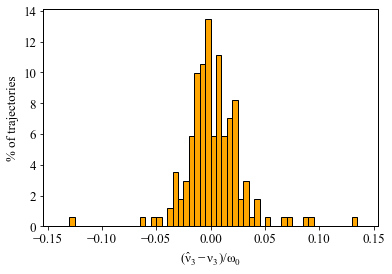

In [42]:
#calculate x positions for bars and heights
x0p25nu3 = intervals0p25nu3[1:] 
heights0p25nu3 = (np.array(freq0p25nu3)/171)*100

#creat the bar chart
plt.bar(x0p25nu3, heights0p25nu3, width=-0.005, align='edge', alpha = 1, color = 'orange', edgecolor='black')  
plt.xlabel(r"$\mathrm{(\hat{\nu}_3 - \nu_3)/\omega_0}$")
plt.ylabel('% of trajectories')
plt.savefig('threepeaksbarchartnu3_aftersplitting.pdf', bbox_inches='tight')
plt.show()